# Table for Four (Spring 2019) participation analysis

By: [Luiz Fernando Porto](https://www.linkedin.com/in/luizfporto/)

This data analysis provides information from the **Table for Four** event organized for the Unite UW Spring 2019 participants, facilitators and program leaders. 

Table for Four happens once a quarter and the idea is that those participating will have dinner with 3 other individuals that they do not know much about, such as people from different program days of Unite UW. It is a great opportunity for them to get out of their comfort zone, meet new people and get food at a nice restaurant!

The data were drawn from a *Google Sheets* form where all those interested in participating would fill in some basic information about themselves, such as name, phone number, Unite UW program day and budget for the event.

In [60]:
# Import necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from pywaffle import Waffle

%matplotlib inline

In [61]:
# Sets a new current directory
os.chdir(r"C:\Users\porto\OneDrive\Documents")
print(os.getcwd())

C:\Users\porto\OneDrive\Documents


In [62]:
# Stores the Table for Four - Spring 2019 dataset imported from Google Sheets
table_for_four = pd.read_csv("table_for_4_spring_unite_uw.csv")

In [63]:
# Remove everything but numbers (digits) from the 'Phone Number' column
table_for_four['Phone Number'] = table_for_four['Phone Number'].str.replace('\D+', '')

# 
names = table_for_four['Name (First & Last)']
phone_numbers = table_for_four['Phone Number']
email = table_for_four['UW Email']

# Drops columns containing participants' personal information
table_for_four = table_for_four.drop(['Name (First & Last)', 'Phone Number', 'UW Email'], axis=1)

In [64]:
# Rename the dataframe columns for greater readability
table_for_four = table_for_four.rename(columns={'Domestic / Exchange / International student?': 'origin',
                                                'What year are you?': 'class_standing',
                                                'Where do you live?': 'housing_type',
                                                'Dietary Restriction?': 'dietary_restriction',
                                               'Who is your facilitator? (If you are a facilitator just mark the option with your name)': 'facilitator',
                                               'Which program are you a part of?': 'program_day',
                                               'What is your budget? (Can check multiple)': 'budget',
                                               'Dietary Restriction?': 'dietary_restriction'})

In [65]:
# This column is related to Game Night, not Table for Four
table_for_four = table_for_four.drop(columns=['(Optional) What are your favorite party games?'])

In [66]:
# First 10 rows
table_for_four.head(7)

,Timestamp,origin,program_day,facilitator,class_standing,housing_type,budget,dietary_restriction
0,2019/05/01 10:56:58 AM MDT,International,Wednesday (Julia),Anuujin,Freshman,West Campus Dorms,Under $10;Between $10-15,Vegetarian;No Seafood;No Pork;No Beef
1,2019/05/01 11:06:33 AM MDT,Domestic,Tuesday (Sarah),Rory,Junior,North Campus Dorms,I don't care! YOLO,No restrictions
2,2019/05/01 11:10:05 AM MDT,International,Tuesday (Sarah),Emma,Freshman,West Campus Dorms,Between $10-15;Let's go fancy AF $15+;I don't ...,No restrictions
3,2019/05/01 11:13:39 AM MDT,Domestic,Tuesday (Sarah),Rory,Freshman,West Campus Dorms,Between $10-15;Let's go fancy AF $15+;I don't ...,Vegetarian
4,2019/05/01 12:41:00 PM MDT,Domestic,Tuesday (Sarah),Leary,Freshman,West Campus Dorms,Between $10-15;Let's go fancy AF $15+;I don't ...,No restrictions
5,2019/05/01 12:41:22 PM MDT,International,Thursday (Rokas),Luiz Fernando,Freshman,North Campus Dorms,Let's go fancy AF $15+;I don't care! YOLO,No human
6,2019/05/01 12:44:05 PM MDT,Domestic,Tuesday (Sarah),Kevin,Freshman,Commute,I don't care! YOLO,Food allergy


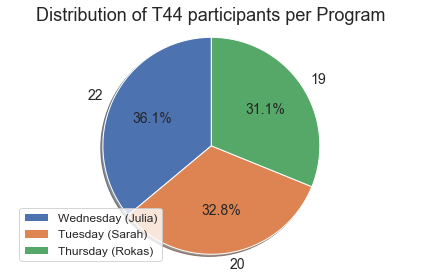

<Figure size 432x288 with 0 Axes>

In [67]:
values = table_for_four['program_day'].value_counts()
labels = table_for_four['program_day'].unique()

# Create a pie chart of the program distribution of T44 participants
plt.pie(
    x=values,
    labels=values,
    startangle=90,
    autopct='%.1f%%', # Adds the percentage values
    shadow = True, # Nice shadow effect to the pie chart
    textprops={'fontsize': 14} # Font size for the values in the pie
)

# View the plot drop above
plt.axis('equal')

# Add a title and a legend to the plot
plt.title('Distribution of T44 participants per Program', fontsize=18)
plt.legend(labels,loc=3, fontsize=12)

# View the plot
plt.tight_layout()
plt.show()

# Save the plot
plt.savefig('pie_program_distribution.png')

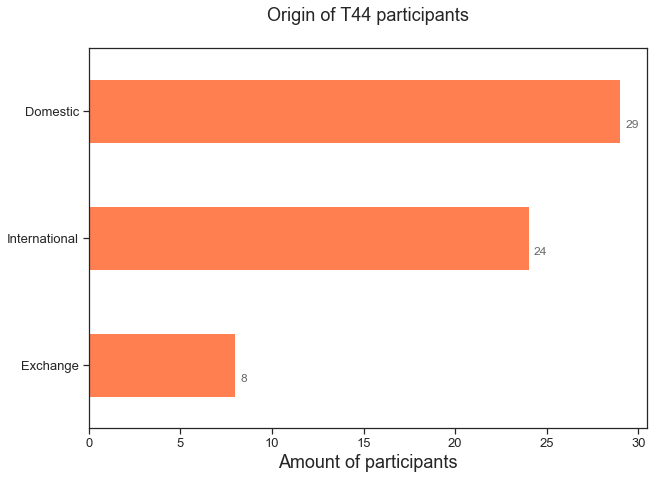

In [68]:
origin = table_for_four['origin'].value_counts()

ax = origin.plot(kind='barh', figsize=(10,7), color="coral", fontsize=13);

ax.set_alpha(0.5)
ax.set_title("Origin of T44 participants\n", fontsize=18)
ax.set_xlabel("Amount of participants", fontsize=18);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()), 2)), fontsize=12, color='dimgrey')
    
# invert for largest on top 
ax.invert_yaxis()

# Save the plot as a .png file
plt.savefig('bar_origin_participants.png')

In [69]:
# Write the dataset to a comma-separated values (csv) file
table_for_four.to_csv(r'C:\Users\porto\OneDrive\Documents\table_for_four_updated.csv', index=False, header=True)

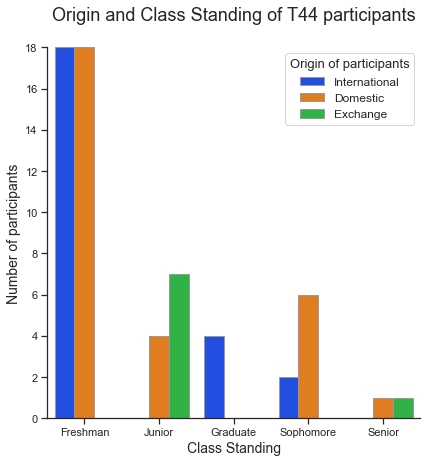

In [70]:
# Creates a Grouped barplot with the numbers of participants in different class standings and their origin
origin_class_standing_count = sns.catplot(x='class_standing', hue='origin', kind="count",
                                            palette="bright", edgecolor=".6", height=6,
                                            legend=False, data=table_for_four);

# Set the labels for the x and y axis, the legend and the title
plt.title("Origin and Class Standing of T44 participants\n", fontsize=18)
origin_class_standing_count.set_xlabels('Class Standing', fontsize=14)
origin_class_standing_count.set_ylabels('Number of participants', fontsize=14)
plt.legend(title='Origin of participants', fontsize=12,title_fontsize=13)
plt.ylim(0,18)

# Save the chart as a .png file
origin_class_standing_count.savefig('groupedbar_origin_participants.png')

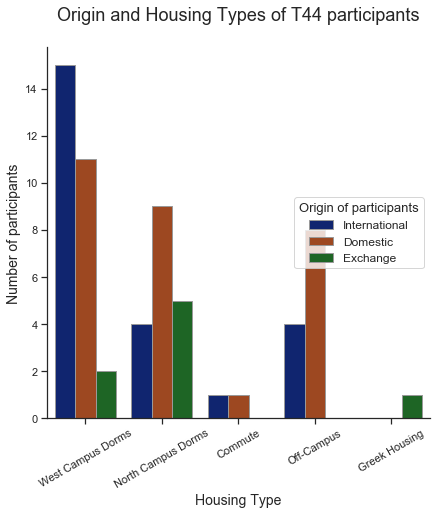

In [71]:
# Creates a Grouped barplot with the numbers of participants in different housing accomodations and their origin
origin_housing_count = sns.catplot(x='housing_type', hue='origin', kind="count",
                                            palette="dark", edgecolor=".6", height=6,
                                            legend=False, data=table_for_four);

# Set the labels for the x and y axis, the legend and the title
plt.title("Origin and Housing Types of T44 participants\n", fontsize=18)
origin_housing_count.set_xlabels('Housing Type', fontsize=14)
origin_housing_count.set_ylabels('Number of participants', fontsize=14)
plt.legend(title='Origin of participants', loc='right',fontsize=12, title_fontsize=13)
plt.xticks(rotation=30)

# Save the chart as a .png file
origin_housing_count.savefig('groupedbar_origin_participants.png')

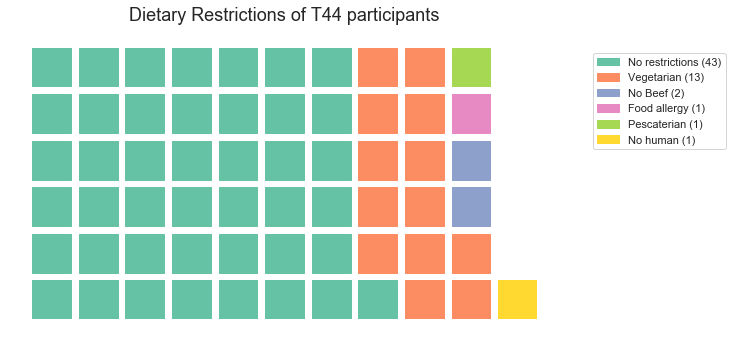

In [72]:
# Adresses some issues with the data entry process for the dietary_restriction column
table_for_four.replace('No restrictions;I don’t prefer fast food like burgers, please', 'No restrictions', inplace=True)
table_for_four.replace('none! ', 'No restrictions', inplace=True)
table_for_four.replace('Vegetarian;No Seafood;No Pork;No Beef', 'Vegetarian', inplace=True)

# Get the list of dietary restrictions and the number of people that have them
dietary_restriction_count = table_for_four.dietary_restriction.value_counts()

# Plots a Waffle graph with the above information
fig = plt.figure(
    FigureClass=Waffle, 
    rows=6, 
    values=list(dietary_restriction_count.values),
    labels=["{0} ({1})".format(k, v) for k, v in dietary_restriction_count.items()],
    figsize=(10,5),
    # A 2-tuple (x, y) places the corner of the legend specified by loc at x, y.
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}
)

# tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area. 
# It didn't quite work for this case though, as it is an experimental tool, so I set it equal to False
fig.set_tight_layout(False)

plt.title("Dietary Restrictions of T44 participants\n", fontsize=18)

plt.show()


# Useful resources:
 # https://ashleygingeleski.com/tag/waffle-chart/
 # http://jonathansoma.com/lede/foundations-2018/matplotlib/creating-waffle-charts-in-pandas/